In [ ]:
라이브러리 임포트

In [1]:
import numpy as np
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray

from scipy import signal, ndimage
import matplotlib.pylab as pylab

In [ ]:
영상 표시 함수

In [30]:
def plot_image(image, title):
    pylab.imshow(image), pylab.title(title, size=20), pylab.axis('off')
    
def plot_gray_image(ax, image, title):    
    ax.imshow(image, vmin=0, vmax=255, cmap='gray')
    ax.set_title(title), ax.axis('off')
    ax.set_adjustable('box-forced')       

In [ ]:
형태학적 콘트라스트 향상

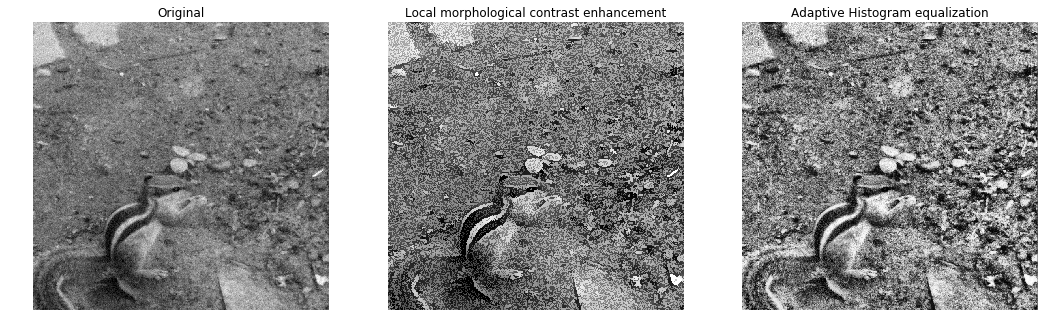

In [47]:

from skimage.filters.rank import enhance_contrast
from skimage.morphology import disk
from skimage import exposure

image = rgb2gray(imread('../images/squirrel.jpg'))
sigma = 0.05
noise = sigma * np.random.standard_normal(image.shape)
noisy_image = (np.clip(image + noise, 0, 1) * 255).astype(np.uint8)
enhanced_image = enhance_contrast(noisy_image, disk(5))   
equalized_image = exposure.equalize_adapthist(noisy_image)
equalized_image =(equalized_image * 255).astype(np.uint8)  

fig, axes = pylab.subplots(1, 3, figsize=[18, 7], sharex='row',sharey='row')
axes1, axes2, axes3 = axes.ravel()
plot_gray_image(axes1, noisy_image, 'Original')
plot_gray_image(axes2, enhanced_image, 'Local morphological contrast enhancement')
plot_gray_image(axes3, equalized_image, 'Adaptive Histogram equalization')

In [ ]:
메디안 필터를 사용한 잡음 제거

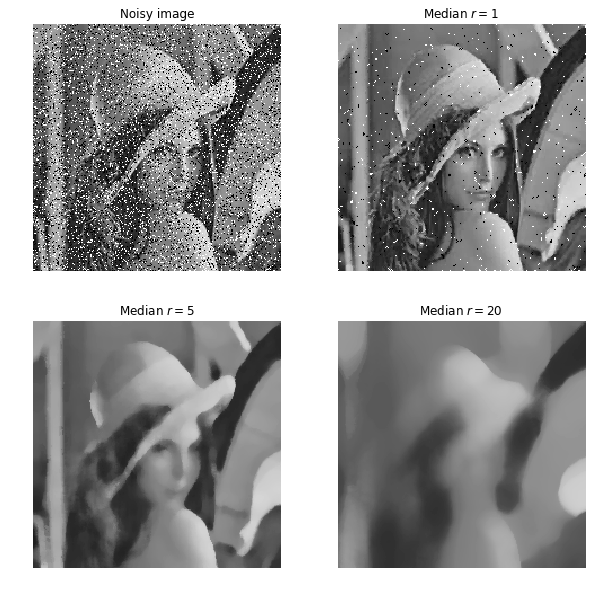

In [33]:
from skimage.filters.rank import median
from skimage.morphology import disk

noisy_image = (rgb2gray(imread('../images/lena.jpg'))*255).astype(np.uint8)
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.9] = 255
noisy_image[noise < 0.1] = 0

fig, axes = pylab.subplots(2, 2, figsize=(10, 10), sharex=True,sharey=True)
axes1, axes2, axes3, axes4 = axes.ravel()
plot_gray_image(axes1, noisy_image, 'Noisy image')
plot_gray_image(axes2, median(noisy_image, disk(1)), 'Median $r=1$')
plot_gray_image(axes3, median(noisy_image, disk(5)), 'Median $r=5$')
plot_gray_image(axes4, median(noisy_image, disk(20)), 'Median $r=20$')

In [ ]:
로컬 엔트로피 계산

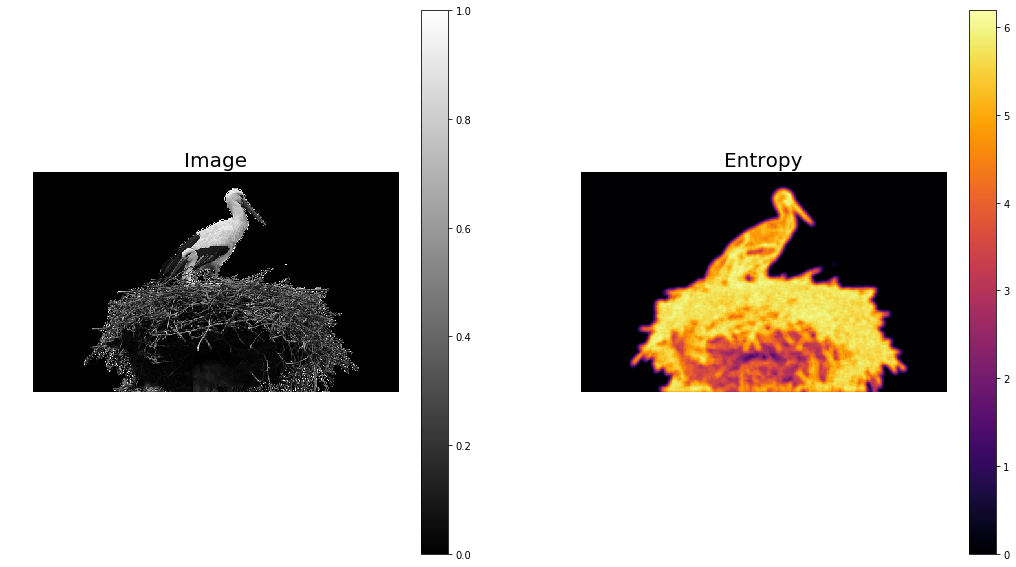

In [48]:
from skimage.morphology import disk
from skimage.filters.rank import entropy

image = rgb2gray(imread('../images/birds.png'))
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(18, 10))
fig.colorbar(axes1.imshow(image, cmap='gray'), ax=axes1)
axes1.axis('off'), axes1.set_title('Image', size=20)
axes1.set_adjustable('box-forced')

fig.colorbar(axes2.imshow(entropy(image, disk(5)), cmap='inferno'), ax=axes2)
axes2.axis('off'), axes2.set_title('Entropy', size=20)
axes2.set_adjustable('box-forced')
pylab.show()

In [ ]:
이진 객체에 구멍 채우기

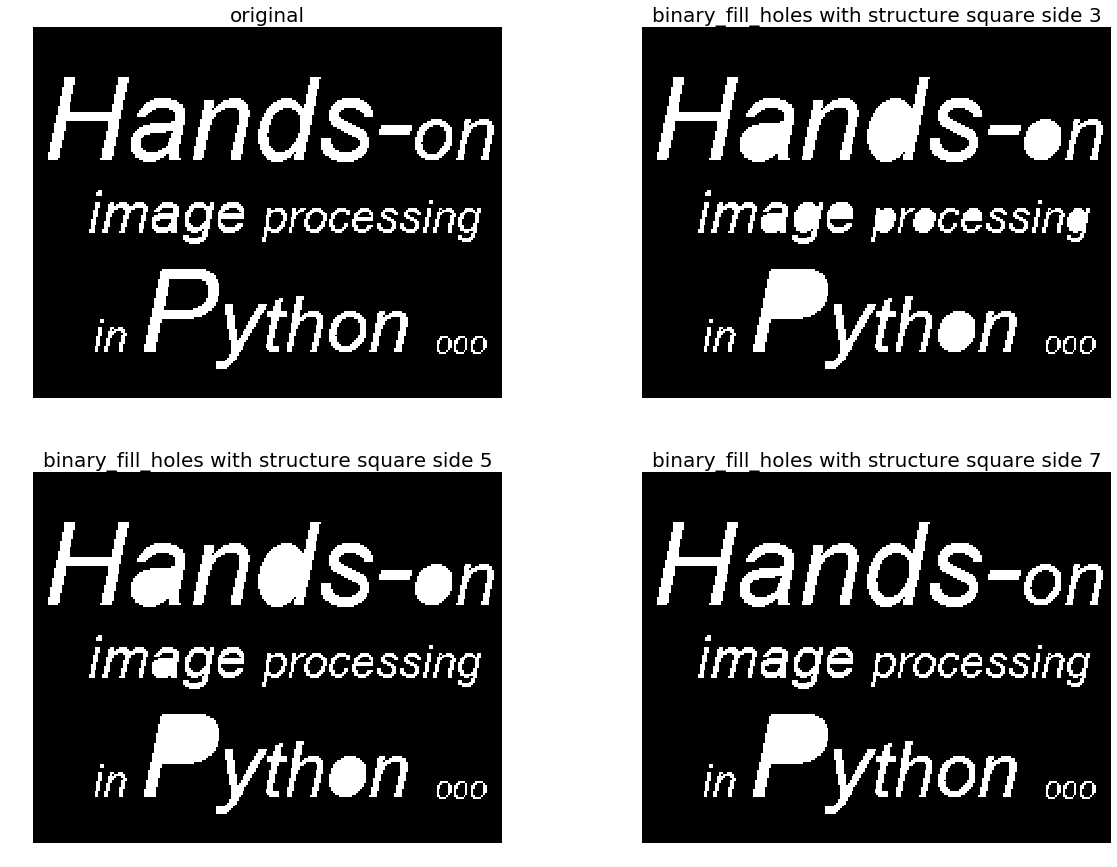

In [54]:
from scipy.ndimage.morphology import binary_fill_holes

im = rgb2gray(imread('../images/text1.png'))
im[im <= 0.5] = 0
im[im > 0.5] = 1

pylab.figure(figsize=(20,15)), pylab.gray()
pylab.subplot(221), plot_image(im, 'original')

for i, n in enumerate([3,5,7]):
    im1 = binary_fill_holes(im, structure=np.ones((n,n)))
    title = 'binary_fill_holes with structure square side ' + str(n)
    pylab.subplot(2, 2, i+2), plot_image(im1, title) # 영상 표시 함수 사용
pylab.show()

In [ ]:
열림과 닫힘을 사용한 잡음 제거

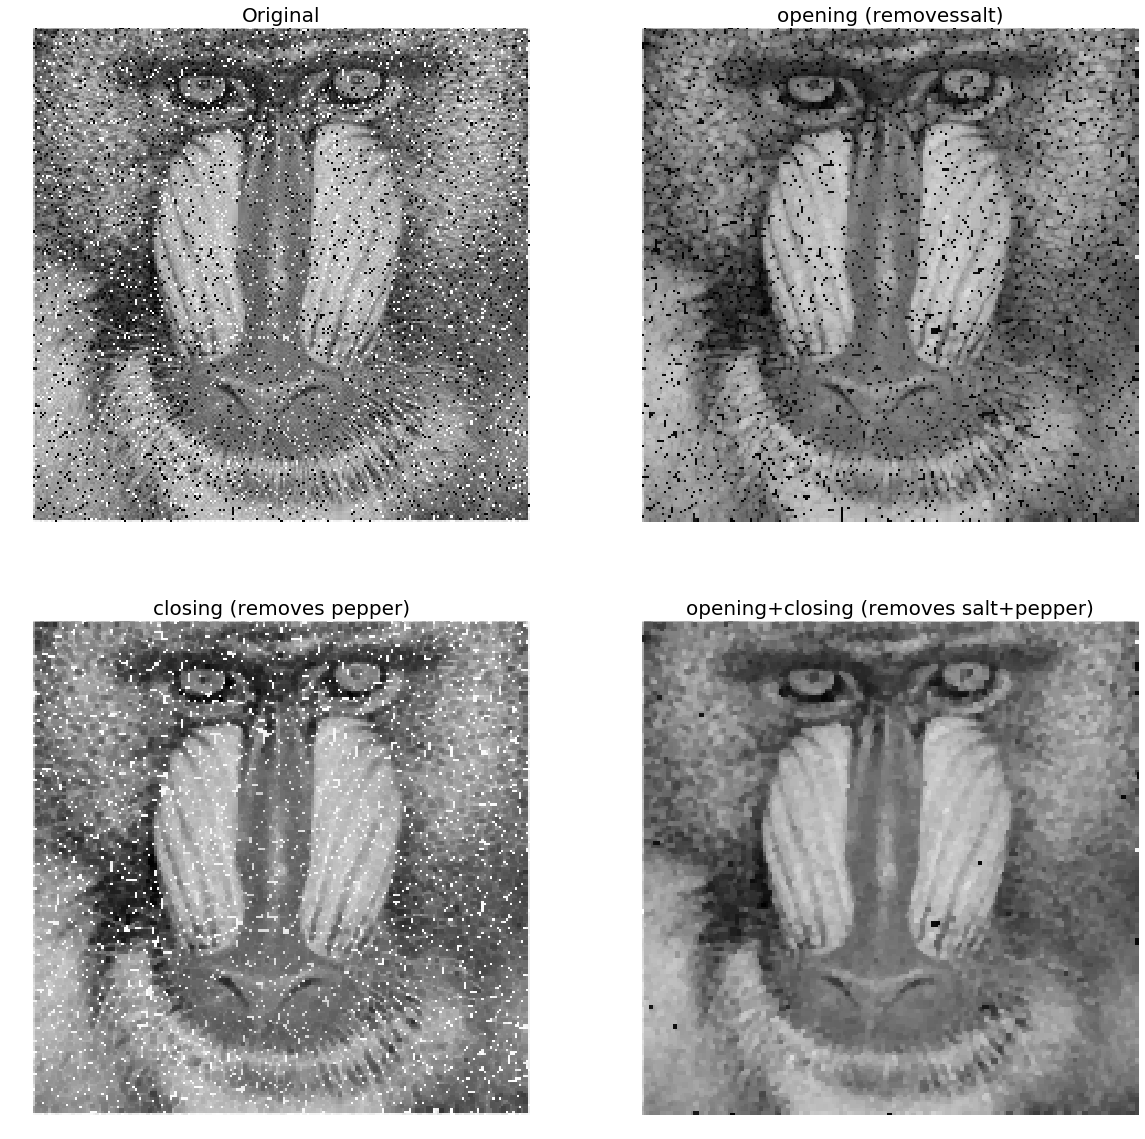

In [53]:
from scipy import ndimage
im = rgb2gray(imread('../images/mandrill_spnoise_0.1.jpg'))
im_o = ndimage.grey_opening(im, size=(2,2))
im_c = ndimage.grey_closing(im, size=(2,2))
im_oc = ndimage.grey_closing(ndimage.grey_opening(im, size=(2,2)),size=(2,2))

pylab.figure(figsize=(20,20)), pylab.gray()
pylab.subplot(221), plot_image(im, 'Original')
pylab.subplot(222), plot_image(im_o, 'opening (removessalt)')
pylab.subplot(223), plot_image(im_c, 'closing (removes pepper)')
pylab.subplot(224), plot_image(im_oc, 'opening+closing (removes salt+pepper)')
pylab.show()

In [ ]:
형태학적 베커(Beucher)의 그레디언트 계산

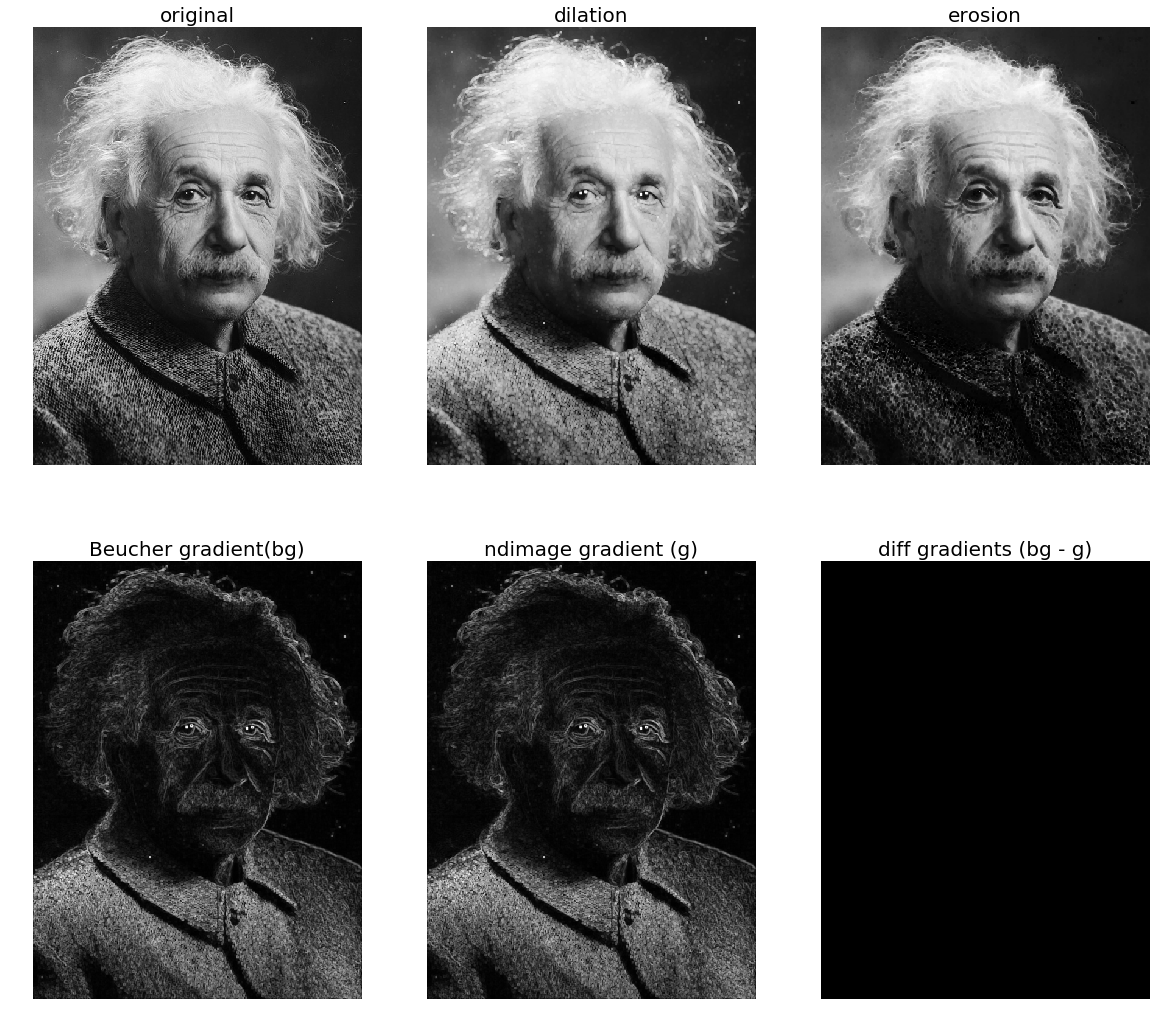

In [55]:
from scipy import ndimage

im = rgb2gray(imread('../images/einstein.jpg'))
im_d = ndimage.grey_dilation(im, size=(3,3))
im_e = ndimage.grey_erosion(im, size=(3,3))
im_bg = im_d - im_e
im_g = ndimage.morphological_gradient(im, size=(3,3))

pylab.figure(figsize=(20,18)), pylab.gray()
pylab.subplot(231), plot_image(im, 'original')
pylab.subplot(232), plot_image(im_d, 'dilation')
pylab.subplot(233), plot_image(im_e, 'erosion')
pylab.subplot(234), plot_image(im_bg, 'Beucher gradient(bg)')
pylab.subplot(235), plot_image(im_g, 'ndimage gradient (g)' )
pylab.subplot(236), plot_image(im_bg - im_g, 'diff gradients (bg - g)')
pylab.show()

In [ ]:
형태학적 라플라스 계산

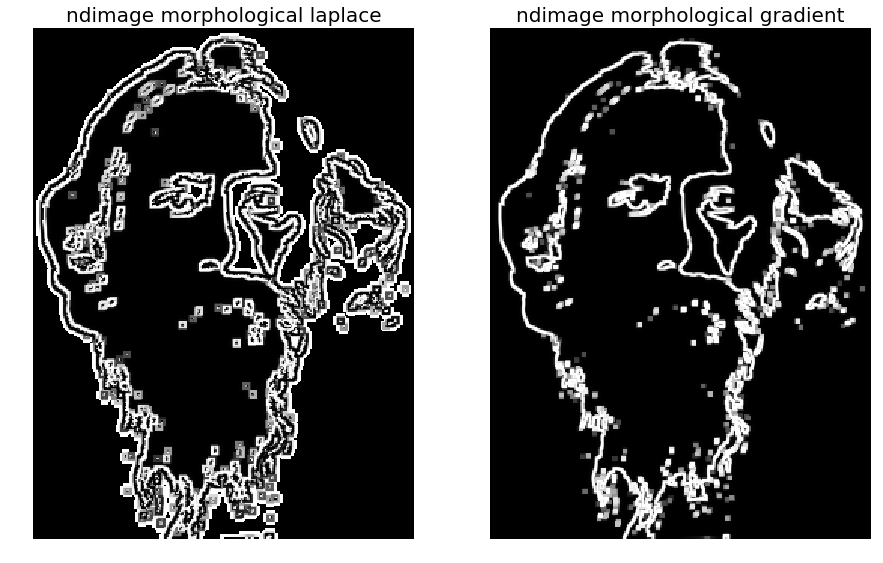

In [56]:
im = imread('../images/tagore.png')[...,3]
im_g = ndimage.morphological_gradient(im, size=(3,3))
im_l = ndimage.morphological_laplace(im, size=(5,5))

pylab.figure(figsize=(15,10))
pylab.subplot(121), plot_image(im_l, 'ndimage morphological laplace')
pylab.subplot(122), plot_image(im_g, 'ndimage morphological gradient')
pylab.show()